In [1]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import os,warnings,itertools,datetime,time,math

import torch
import pandas as pd

In [104]:
def numberToBase(n,b):
    n0 = n
    n = abs(n)
    if n == 0: return '0'
    digits = []
    while n:
        digits.append(int(n % b))
        n //= b
    r = ('-' if n0<0 else '') + '_'.join([str(k) for k in digits[::-1]])
    return r 

def edge_weight(k0,k1):
    assert len(k0)==len(k1),'Error: Indices in different dimensions'
    return (int(sum([abs(int(k0[c])-int(k1[c])) for c in range(len(k0))])==1))

def generate_weights_nullstate(dim,axlen,Snum=2):
    node_map = dict()
    for n in range(axlen**dim):
        nn = numberToBase(n,axlen).replace('_','')
        node_map[n] = '0'*(dim-len(nn))+nn
    G = np.zeros(shape=(axlen**dim,axlen**dim))
    for m in range(G.shape[0]):
        for n in range(G.shape[1]):
            G[m,n] = edge_weight(node_map[m],node_map[n])
    s = rnd.randint(Snum,size=(axlen**dim))
    specs = {
        'GraphDim':dim,
        'AxisLength':axlen,
        'StatesNumber':Snum,
        'NodeMap':node_map
    }
    return s,G,specs

def iterate_graph(s,W,specs,f_agg = lambda x: x, iterations=200):
    S = []
    sc = s.copy()
    for k in range(iterations):
        S.append(sc)
        sc = np.round(f_agg(np.mod(np.einsum('ij,j->i',W,sc),specs['StatesNumber'])))
    return np.array(S)

In [96]:
s0,W,specs = generate_weights_nullstate(dim=4,axlen=4,Snum=4)

print('Number of nodes: {0}^{1} = {2}'.format(specs['AxisLength'],specs['GraphDim'],specs['AxisLength']**specs['GraphDim']))
print('{0} distinct possible states'.format(specs['StatesNumber']))

Number of nodes: 4^4 = 256
4 distinct possible states


In [97]:
s_det_0 = rnd.randint(2,size=(64))
s_det_1 = rnd.randint(2,size=(64))

s_0 = rnd.randint(specs['StatesNumber'],size=(specs['AxisLength']**specs['GraphDim']))
s_0[:s_det_0.shape[0]] = s_det_0
s_1 = rnd.randint(specs['StatesNumber'],size=(specs['AxisLength']**specs['GraphDim']))
s_1[:s_det_1.shape[0]] = s_det_1

In [107]:
S_0 = iterate_graph(
    s=np.append(s_det_0,rnd.randint(specs['StatesNumber'],size=(specs['AxisLength']**specs['GraphDim']-s_det_0.shape[0]))),
    W=W,
    specs=specs,
    f_agg=lambda x: specs['StatesNumber']/(1+np.exp(-x+specs['StatesNumber']/2)),
    iterations=256
)

S_1 = iterate_graph(
    s=np.append(s_det_0,rnd.randint(specs['StatesNumber'],size=(specs['AxisLength']**specs['GraphDim']-s_det_1.shape[0]))),
    W=W,
    specs=specs,
    f_agg=lambda x: specs['StatesNumber']/(1+np.exp(-x+specs['StatesNumber']/2)),
    iterations=256
)

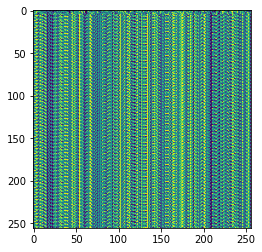

In [108]:
plt.imshow(S_0)

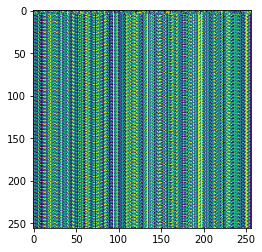

In [109]:
plt.imshow(S_1)

In [114]:
np.append(s_det_0,rnd.randint(specs['StatesNumber'],size=(specs['AxisLength']**specs['GraphDim']-s_det_0.shape[0]))).shape

(256,)

In [115]:
s_0.shape

(256,)